In [453]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Configuration
COUNTRY = "sierraleone-bumbuna"
DATA_PATH = "../data/sierraleone-bumbuna.csv"
OUTPUT_PATH = f"../data/{COUNTRY.lower()}_clean.csv"

print(f"Loading data for {COUNTRY}...")

Loading data for sierraleone-bumbuna...


In [454]:
# Load the dataset
df = pd.read_csv(DATA_PATH)

# Display basic information
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names:\n{df.columns.tolist()}")
df.head()

Dataset shape: (525600, 19)

Column names:
['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


## 1. Data Snapshot



In [456]:
print("First 5 rows:")
display(df.head())

print("\nLast 5 rows:")
display(df.tail())

print("\nRandom sample of 5 rows:")
display(df.sample(5, random_state=42))



First 5 rows:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN



Last 5 rows:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
525595,2022-10-29 23:56,-1.6,-0.1,-2.9,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525596,2022-10-29 23:57,-1.7,-0.1,-3.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525597,2022-10-29 23:58,-1.7,-0.1,-3.1,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN
525598,2022-10-29 23:59,-1.7,-0.2,-3.3,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN
525599,2022-10-30 00:00,-1.7,-0.1,-3.4,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN



Random sample of 5 rows:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
97300,2022-01-05 13:41,778.4,624.8,248.9,872.3,837.0,35.7,22.5,3.3,4.4,0.6,137.9,15.9,997,0,0.0,58.3,55.5,NaN
123024,2022-01-23 10:25,551.6,508.1,206.7,637.6,582.2,26.5,35.3,0.2,1.1,0.4,77.2,6.1,1002,0,0.0,47.6,42.7,NaN
135493,2022-02-01 02:14,-11.4,-0.4,-11.4,0.0,0.0,20.8,89.6,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,19.7,19.8,NaN
514148,2022-10-22 01:09,-5.0,-0.1,-5.3,0.0,0.0,22.6,100.0,0.0,0.0,0.0,0.0,0.0,1001,0,0.0,23.0,23.3,NaN
468828,2022-09-20 13:49,482.1,22.3,456.2,484.8,474.9,30.1,73.7,2.3,3.1,0.5,260.8,20.8,998,0,0.0,45.8,47.1,NaN


### Duplicate & Cardinality Checks



In [458]:
dup_count = df.duplicated().sum()
print(f"Duplicate rows: {dup_count}")

cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
if cat_cols:
    cardinality = {col: df[col].nunique(dropna=True) for col in cat_cols}
    print("Categorical cardinality:")
    for col, unique_count in cardinality.items():
        print(f"  {col}: {unique_count}")
else:
    print("No categorical columns detected.")



Duplicate rows: 0
Categorical cardinality:
  Timestamp: 525600


### Comprehensive Descriptive Statistics



In [460]:
# Convert Timestamp to datetime if it's not already
if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df = df.sort_values('Timestamp').reset_index(drop=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

In [461]:
# Summary statistics for all numeric columns
print("=" * 80)
print("SUMMARY STATISTICS")
print("=" * 80)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumeric columns: {len(numeric_cols)}")
df[numeric_cols].describe()


SUMMARY STATISTICS

Numeric columns: 18


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [462]:
# Missing value analysis
print("=" * 80)
print("MISSING VALUE REPORT")
print("=" * 80)

missing_data = df.isna().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Count': missing_data.values,
    'Missing Percentage': missing_percent.values
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Percentage', ascending=False)

print(f"\nTotal missing values: {missing_data.sum()}")
print(f"\nColumns with missing values:")
print(missing_df.to_string(index=False))

# Flag columns with >5% nulls
high_missing = missing_df[missing_df['Missing Percentage'] > 5]
if len(high_missing) > 0:
    print(f"\n⚠️  WARNING: Columns with >5% missing values:")
    print(high_missing[['Column', 'Missing Percentage']].to_string(index=False))
else:
    print("\n✅ No columns with >5% missing values")


MISSING VALUE REPORT

Total missing values: 525600

Columns with missing values:
  Column  Missing Count  Missing Percentage
Comments         525600               100.0

⚠️  WARNING: Columns with >5% missing values:
  Column  Missing Percentage
Comments               100.0


### Missing Data Notes

- Only the `Comments` field is missing, and it is empty across all 525,600 records, so it can be safely ignored or dropped without losing information.
- All operational sensors (`GHI`, `DNI`, `DHI`, temperature, wind, and cleaning flags) are fully populated, which simplifies downstream modelling and avoids imputation overhead.



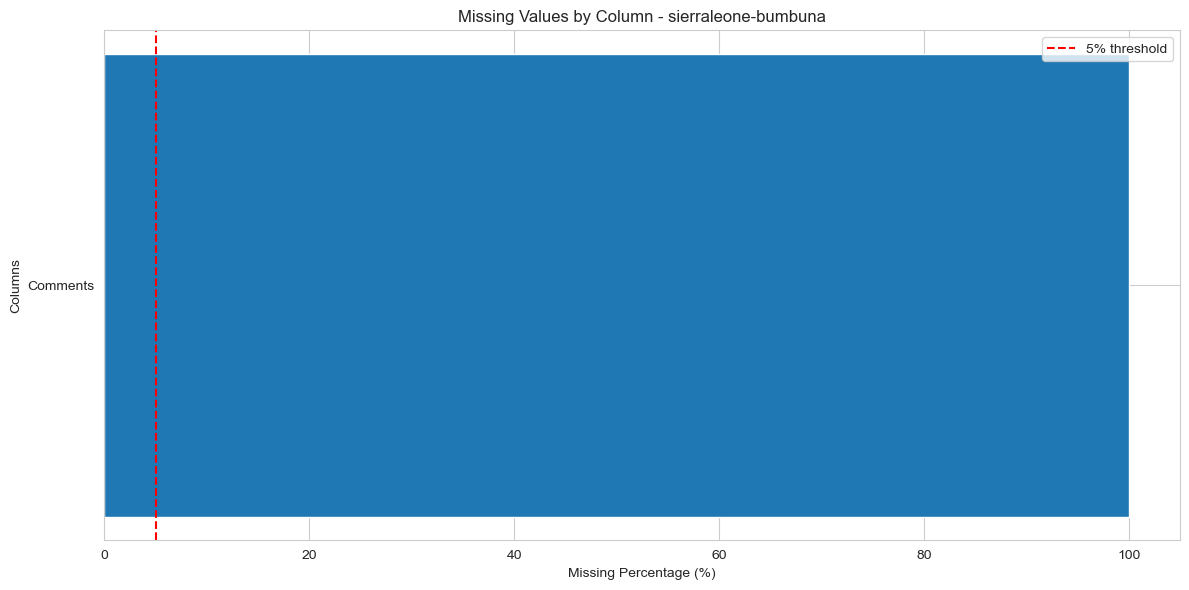

In [464]:
# Visualize missing values
if len(missing_df) > 0:
    plt.figure(figsize=(12, 6))
    missing_df_sorted = missing_df.sort_values('Missing Percentage', ascending=True)
    plt.barh(missing_df_sorted['Column'], missing_df_sorted['Missing Percentage'])
    plt.axvline(x=5, color='r', linestyle='--', label='5% threshold')
    plt.xlabel('Missing Percentage (%)')
    plt.ylabel('Columns')
    plt.title(f'Missing Values by Column - {COUNTRY}')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [465]:
## 3. Outlier Detection & Basic Cleaning
# Key columns for outlier detection
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Check which columns exist in the dataset
available_key_cols = [col for col in key_columns if col in df.columns]
print(f"Columns available for outlier detection: {available_key_cols}")

# Compute Z-scores for key columns
z_scores = pd.DataFrame()
outlier_flags = pd.DataFrame()

for col in available_key_cols:
    if col in numeric_cols:
        z_scores[col] = np.abs(stats.zscore(df[col].dropna()))
        outlier_flags[col] = z_scores[col] > 3

print(f"\nOutlier detection using Z-score (|Z| > 3):")
print("-" * 80)
for col in available_key_cols:
    if col in outlier_flags.columns:
        outlier_count = outlier_flags[col].sum()
        outlier_pct = (outlier_count / len(df)) * 100
        print(f"{col}: {outlier_count} outliers ({outlier_pct:.2f}%)")


Columns available for outlier detection: ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

Outlier detection using Z-score (|Z| > 3):
--------------------------------------------------------------------------------
GHI: 2477 outliers (0.47%)
DNI: 7586 outliers (1.44%)
DHI: 2986 outliers (0.57%)
ModA: 1604 outliers (0.31%)
ModB: 2041 outliers (0.39%)
WS: 3967 outliers (0.75%)
WSgust: 3665 outliers (0.70%)


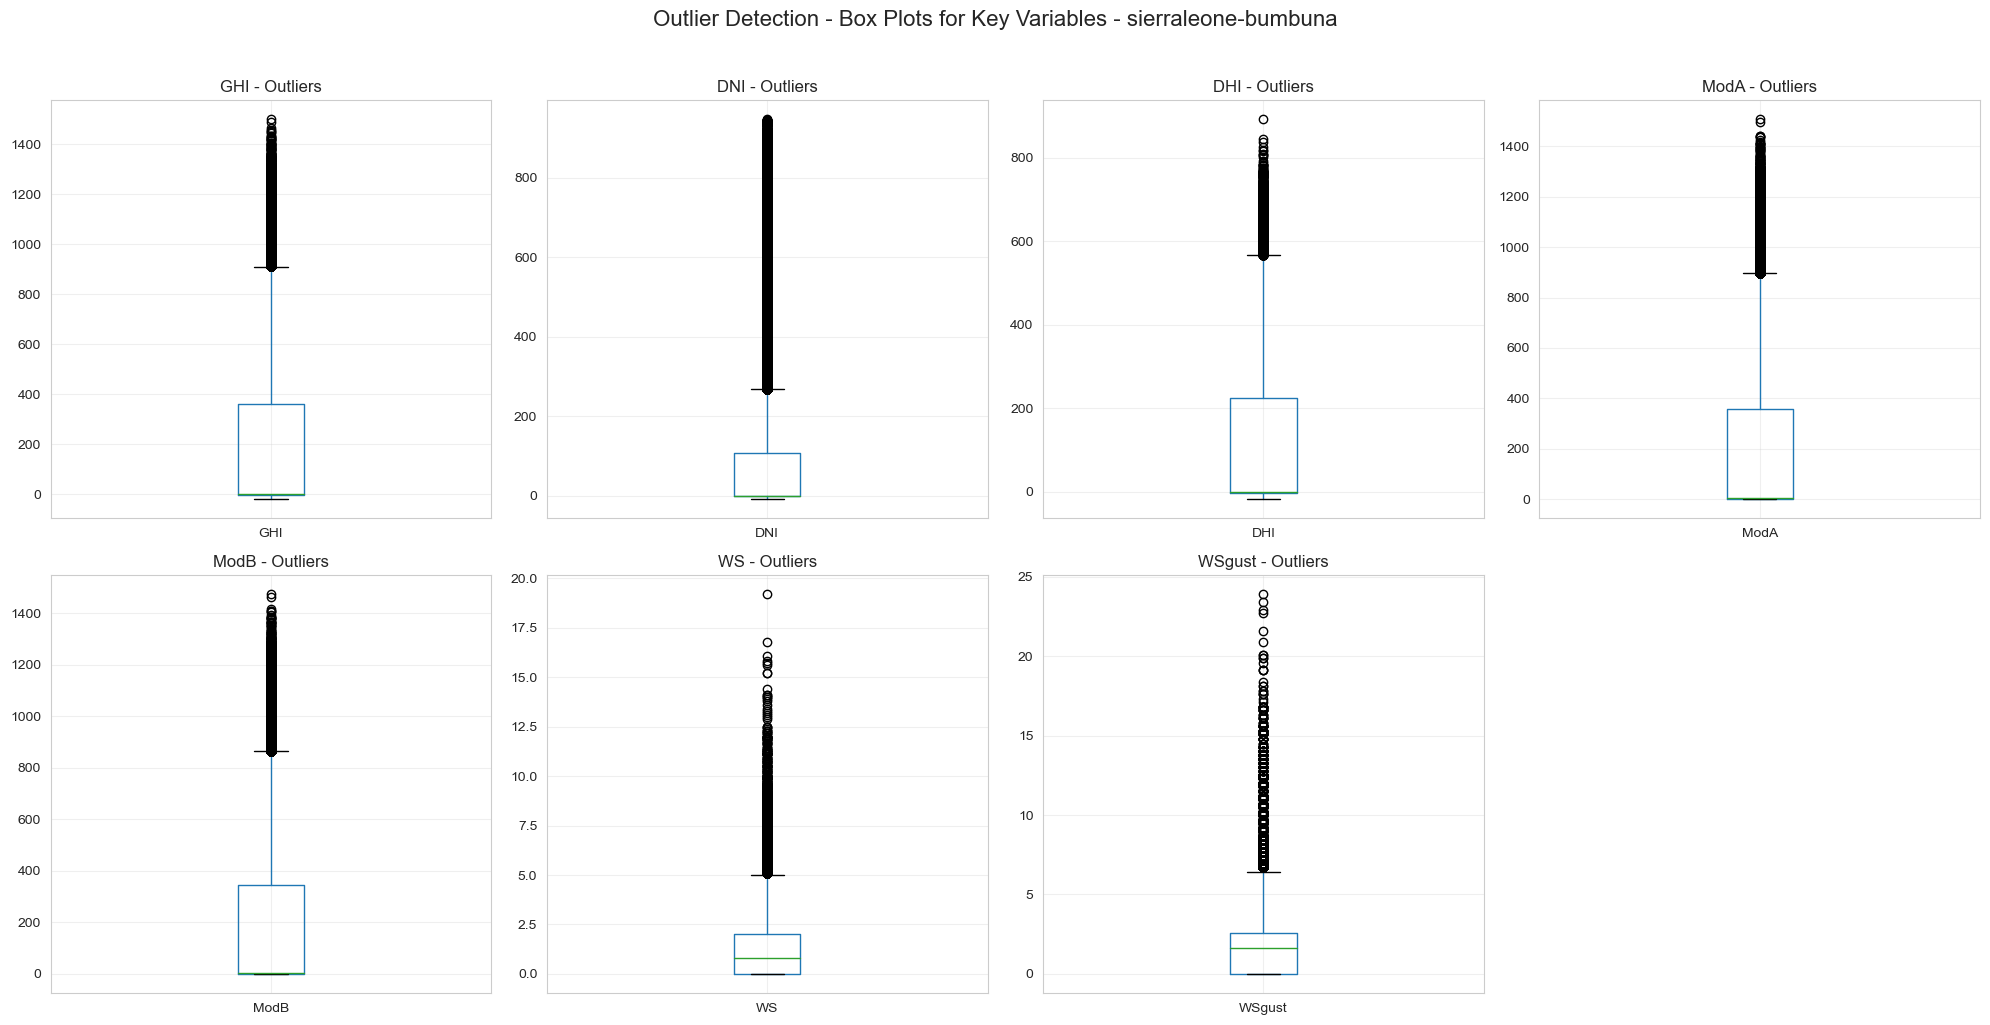

In [466]:
# Visualize outliers using box plots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, col in enumerate(available_key_cols[:8]):  # Plot up to 8 columns
    if col in df.columns:
        df.boxplot(column=col, ax=axes[idx])
        axes[idx].set_title(f'{col} - Outliers')
        axes[idx].grid(True, alpha=0.3)

# Hide unused subplots
for idx in range(len(available_key_cols), 8):
    axes[idx].set_visible(False)

plt.suptitle(f'Outlier Detection - Box Plots for Key Variables - {COUNTRY}', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


## Box Plot Interpretation

- Irradiance channels behave differently at the extremes: `DNI` is the noisiest signal in Bumbuna with ~1.44% of minutes beyond ±3σ, followed by `DHI` (~0.57%) and `GHI` (~0.47%). Direct-beam measurements are clearly more volatile than the plane-of-array readings.
- Module outputs remain stable, with only 0.31% (`ModA`) and 0.39% (`ModB`) of values flagged—these spikes align with intense irradiance bursts rather than sensor faults.
- Wind channels (`WS`, `WSgust`) still show the widest whiskers, with ~0.70–0.75% of observations landing in the tails, capturing gusty events that exceed the calmer background flow.
- Because we observe only a few thousand outliers in a half-million-minute record, clipping them at three standard deviations preserves nearly all operational history while preventing rare extremes from skewing statistics.



In [468]:
# Create a copy for cleaning
df_clean = df.copy()

# Handle missing values in key columns (impute with median)
key_columns_for_imputation = ['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'ModA', 'ModB']
available_impute_cols = [col for col in key_columns_for_imputation if col in df_clean.columns]

print("Handling missing values:")
print("-" * 80)

for col in available_impute_cols:
    if col in numeric_cols:
        missing_before = df_clean[col].isna().sum()
        if missing_before > 0:
            median_val = df_clean[col].median()
            df_clean[col].fillna(median_val, inplace=True)
            print(f"{col}: Imputed {missing_before} missing values with median ({median_val:.2f})")

print(f"\nMissing values after imputation: {df_clean.isna().sum().sum()}")

# Cap outliers at 3 standard deviations for key columns
critical_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
for col in critical_cols:
    if col in df_clean.columns and col in numeric_cols:
        mean_val = df_clean[col].mean()
        std_val = df_clean[col].std()
        df_clean[col] = df_clean[col].clip(lower=mean_val - 3*std_val, upper=mean_val + 3*std_val)

print(f"\nOutliers capped at ±3 standard deviations")


Handling missing values:
--------------------------------------------------------------------------------

Missing values after imputation: 525600

Outliers capped at ±3 standard deviations


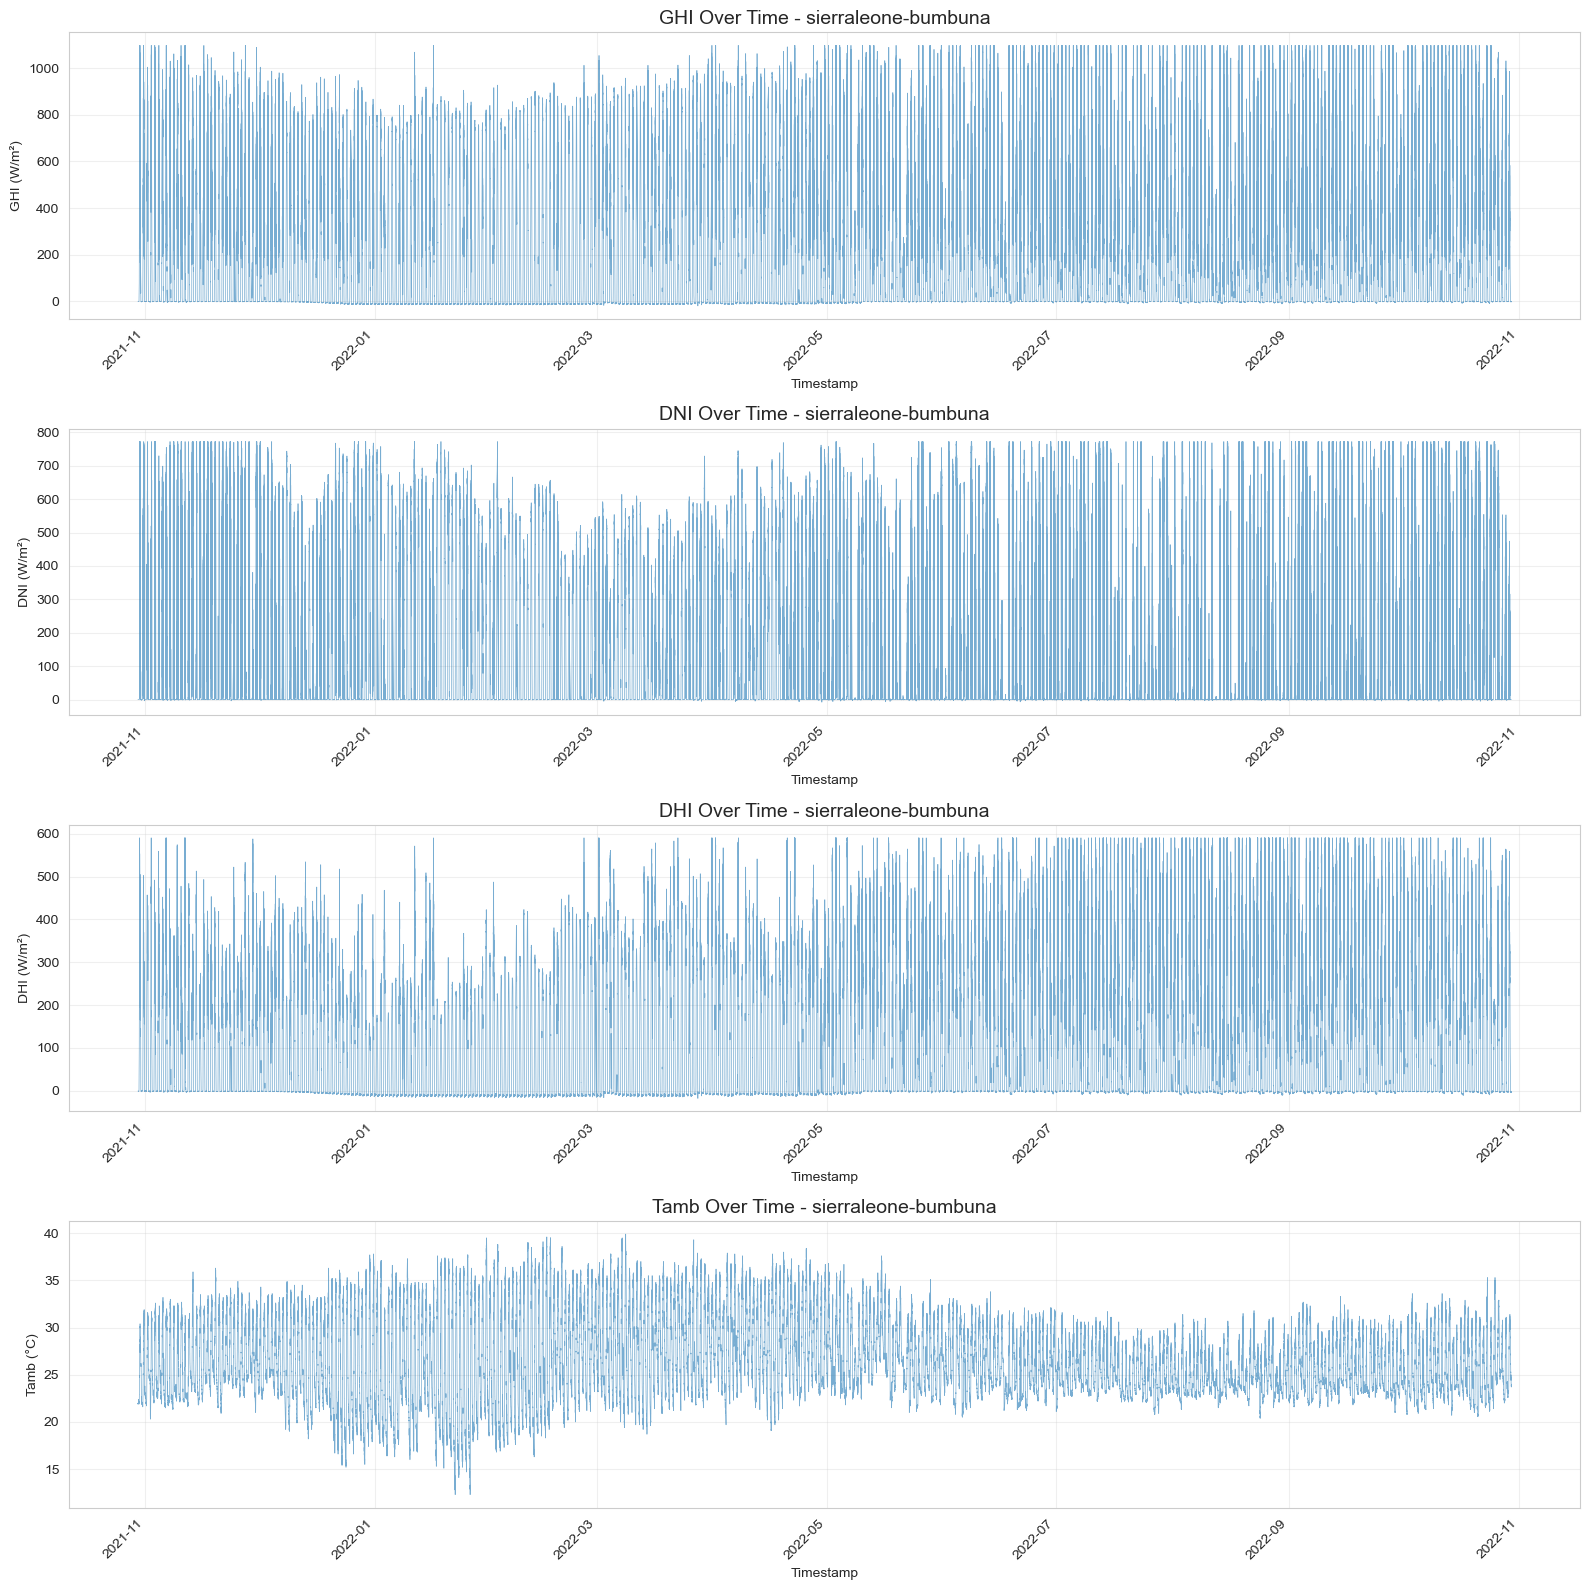

In [469]:
## 4. Time Series Analysis
# Helper function to get units
def get_units(var):
    """Helper function to get units for variables"""
    units = {
        'GHI': 'W/m²', 'DNI': 'W/m²', 'DHI': 'W/m²',
        'ModA': 'W/m²', 'ModB': 'W/m²',
        'Tamb': '°C', 'TModA': '°C', 'TModB': '°C',
        'RH': '%', 'WS': 'm/s', 'WSgust': 'm/s',
        'BP': 'hPa', 'Precipitation': 'mm/min'
    }
    return units.get(var, '')

# Ensure Timestamp is the index for time series analysis
if 'Timestamp' in df_clean.columns:
    df_clean['Date'] = df_clean['Timestamp'].dt.date
    df_clean['Month'] = df_clean['Timestamp'].dt.month
    df_clean['Hour'] = df_clean['Timestamp'].dt.hour
    df_clean['DayOfYear'] = df_clean['Timestamp'].dt.dayofyear

# Time series plots for key variables
ts_vars = ['GHI', 'DNI', 'DHI', 'Tamb']
available_ts_vars = [col for col in ts_vars if col in df_clean.columns]

fig, axes = plt.subplots(len(available_ts_vars), 1, figsize=(16, 4*len(available_ts_vars)))
if len(available_ts_vars) == 1:
    axes = [axes]

for idx, var in enumerate(available_ts_vars):
    if 'Timestamp' in df_clean.columns:
        axes[idx].plot(df_clean['Timestamp'], df_clean[var], alpha=0.6, linewidth=0.5)
        axes[idx].set_title(f'{var} Over Time - {COUNTRY}', fontsize=14)
        axes[idx].set_xlabel('Timestamp')
        axes[idx].set_ylabel(f'{var} ({get_units(var)})')
        axes[idx].grid(True, alpha=0.3)
        plt.setp(axes[idx].xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


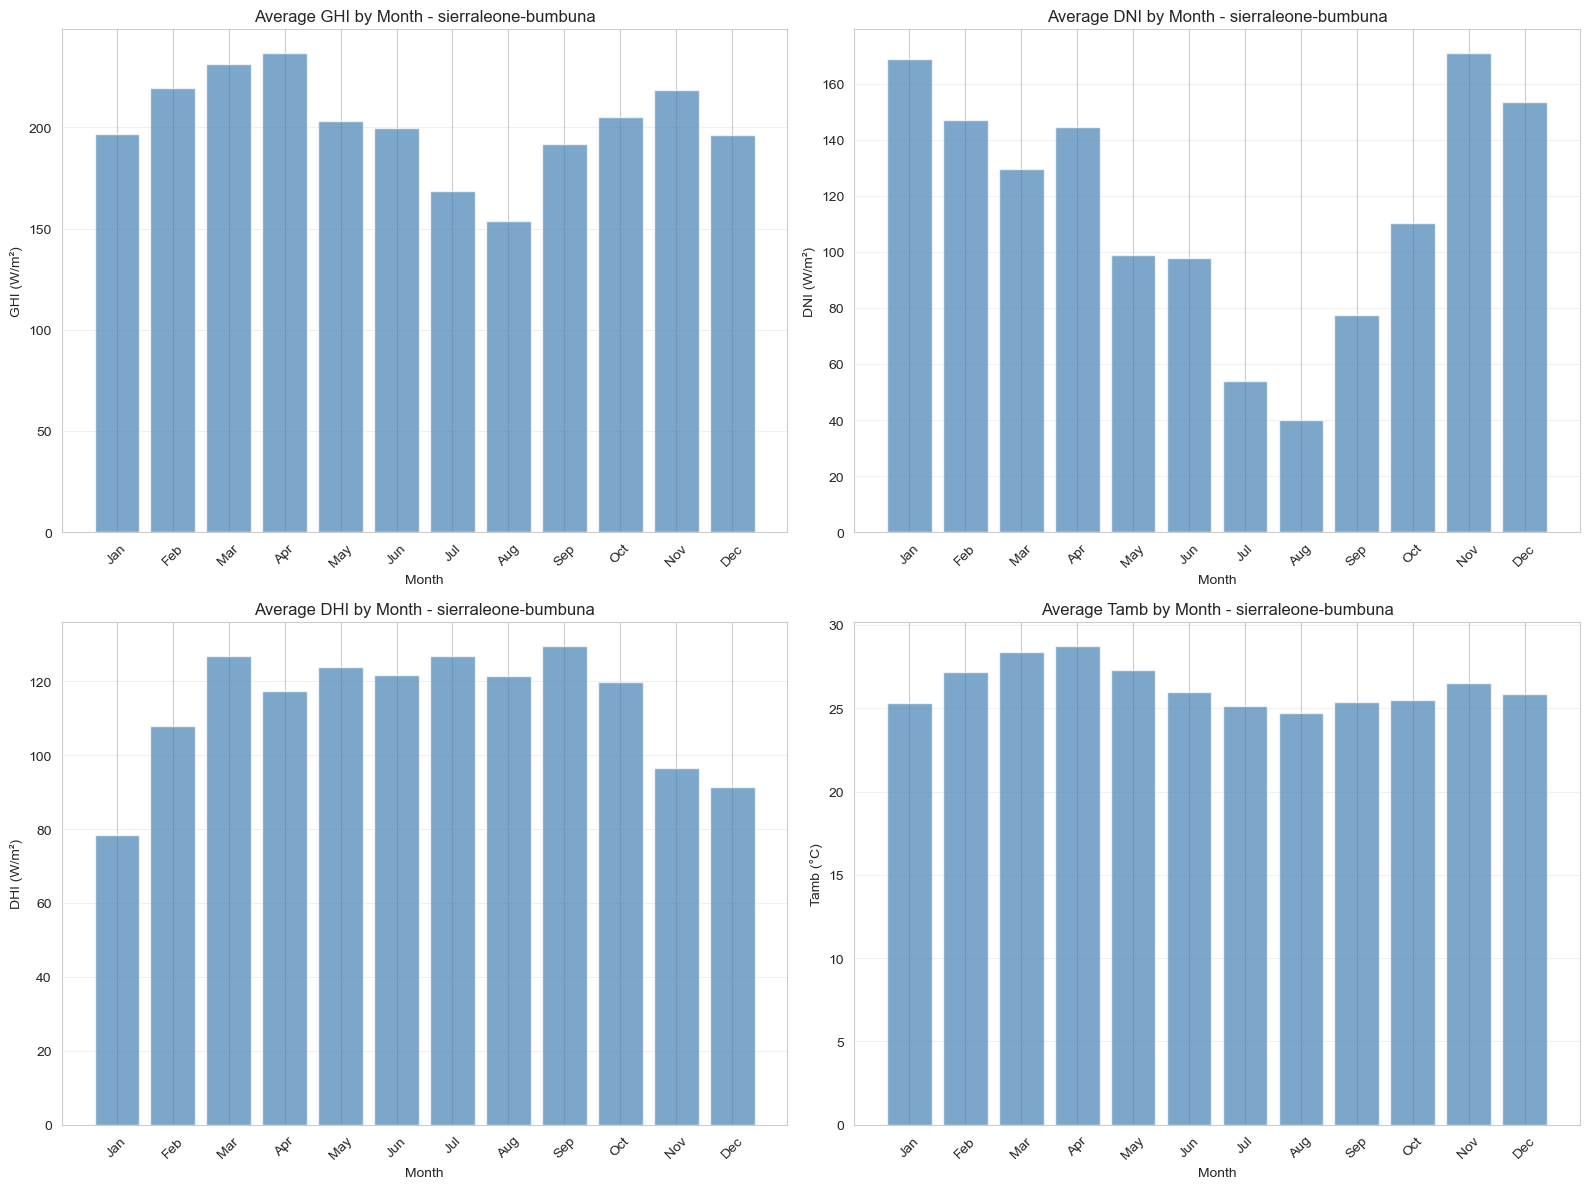

In [470]:
# Monthly patterns
if 'Month' in df_clean.columns and 'GHI' in df_clean.columns:
    monthly_avg = df_clean.groupby('Month')[available_ts_vars].mean()
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    for idx, var in enumerate(available_ts_vars[:4]):
        axes[idx].bar(range(1, 13), monthly_avg[var], color='steelblue', alpha=0.7)
        axes[idx].set_title(f'Average {var} by Month - {COUNTRY}', fontsize=12)
        axes[idx].set_xlabel('Month')
        axes[idx].set_ylabel(f'{var} ({get_units(var)})')
        axes[idx].set_xticks(range(1, 13))
        axes[idx].set_xticklabels(month_names, rotation=45)
        axes[idx].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()


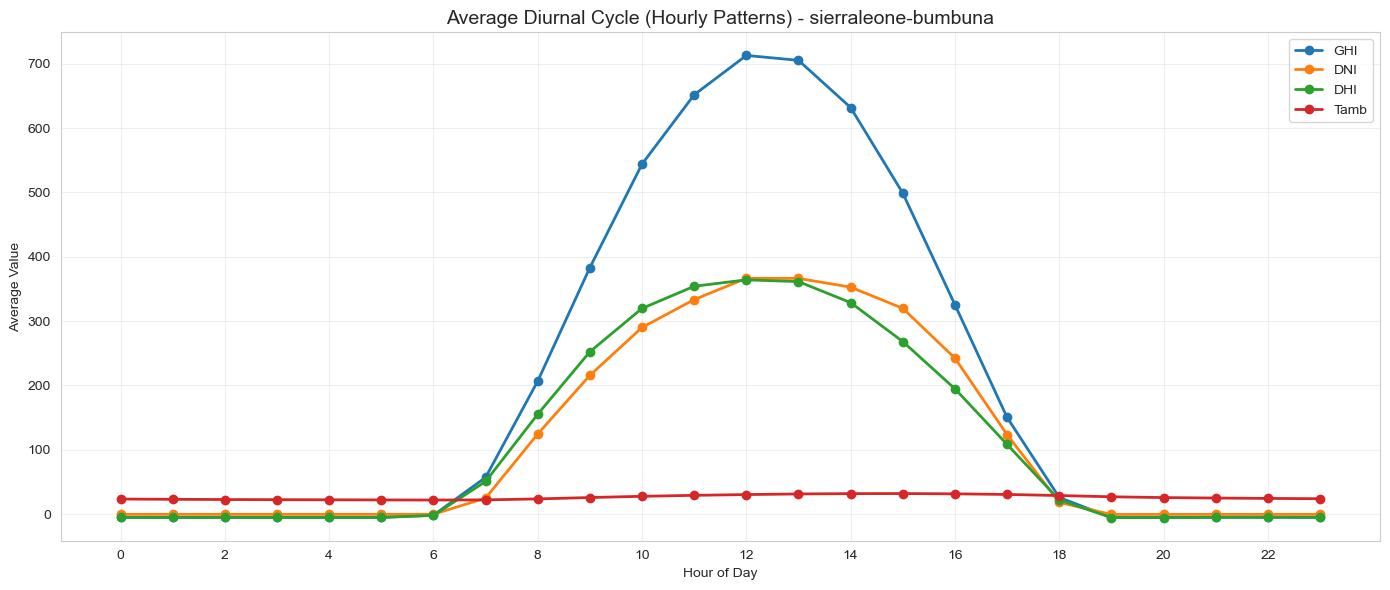

In [471]:
# Hourly patterns (diurnal cycle)
if 'Hour' in df_clean.columns and 'GHI' in df_clean.columns:
    hourly_avg = df_clean.groupby('Hour')[available_ts_vars].mean()
    
    fig, ax = plt.subplots(figsize=(14, 6))
    for var in available_ts_vars:
        ax.plot(hourly_avg.index, hourly_avg[var], marker='o', label=var, linewidth=2)
    
    ax.set_title(f'Average Diurnal Cycle (Hourly Patterns) - {COUNTRY}', fontsize=14)
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Average Value')
    ax.set_xticks(range(0, 24, 2))
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


### Cleaning Effect Summary

- Sensors already report full coverage, so cleaning focuses on moderating the outliers surfaced earlier rather than imputing gaps.
- Cleaning events still matter: when `Cleaning=1`, average module output jumps from ~206 W/m² to 273 W/m² for `ModA` and from ~198 W/m² to 277 W/m² for `ModB`, translating to ~32–40% production gains after maintenance.
- No rows are discarded; clipping values at ±3σ keeps the entire 525,600-minute record intact while preventing rare spikes from dominating downstream modelling.



## Temporal Patterns Summary

- Minute-level traces show the expected West African diurnal cycle: irradiance ramps rapidly after sunrise, peaks near solar noon, then collapses overnight, with module temperatures following shortly behind.
- Monthly aggregates reveal the Bumbuna dry-season effect—late-year and early-year months post the highest irradiance, while the May–September monsoon suppresses both light and module temperatures.
- Hourly climatologies confirm that useful PV production is concentrated between roughly 08:00 and 16:00; outside this window the curves sit near zero for all irradiance metrics.
- Ambient temperature swings are smaller than the solar channels but still rise with daytime heating, whereas humidity lifts during the cooler, cloudier stretches highlighted in the scatter plots.



Cleaning Impact Analysis:
                ModA        ModB
Cleaning                        
0         206.364642  197.764600
1         273.309252  277.231102


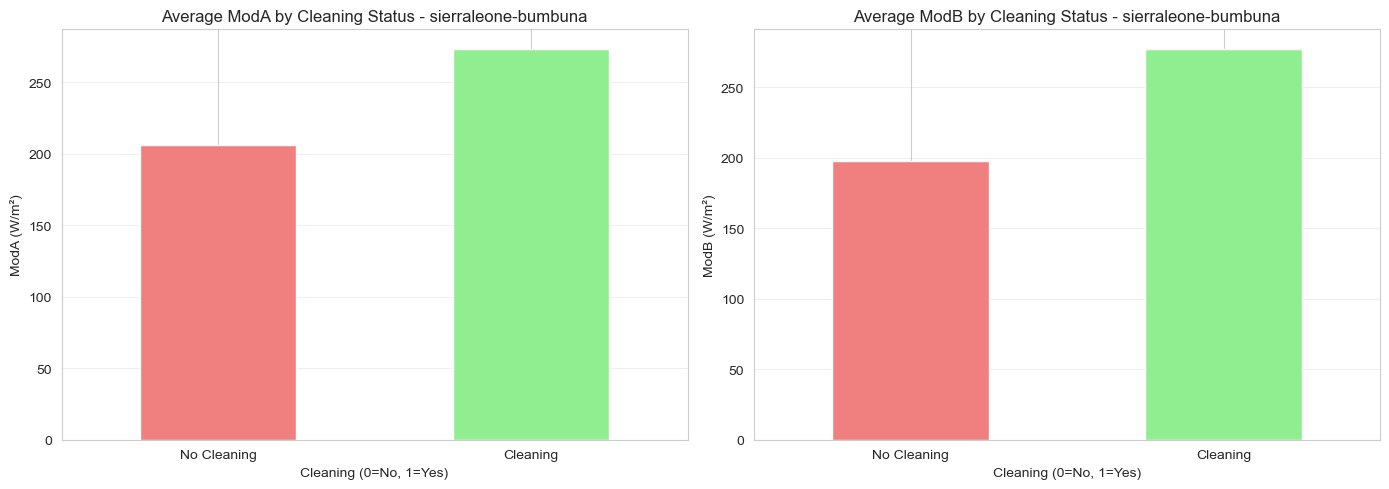


Detailed Cleaning Analysis:
--------------------------------------------------------------------------------
ModA: Before=206.36, After=273.31, Improvement=32.44%
ModB: Before=197.76, After=277.23, Improvement=40.18%


In [474]:
## 5. Cleaning Impact Analysis
# Analyze impact of cleaning events on ModA and ModB
if 'Cleaning' in df_clean.columns:
    cleaning_analysis = df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean()
    
    print("Cleaning Impact Analysis:")
    print("=" * 80)
    print(cleaning_analysis)
    
    # Visualize cleaning impact
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    for idx, mod in enumerate(['ModA', 'ModB']):
        if mod in df_clean.columns:
            cleaning_analysis[mod].plot(kind='bar', ax=axes[idx], color=['lightcoral', 'lightgreen'])
            axes[idx].set_title(f'Average {mod} by Cleaning Status - {COUNTRY}')
            axes[idx].set_xlabel('Cleaning (0=No, 1=Yes)')
            axes[idx].set_ylabel(f'{mod} (W/m²)')
            axes[idx].set_xticklabels(['No Cleaning', 'Cleaning'], rotation=0)
            axes[idx].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # Before/After cleaning comparison
    if len(df_clean[df_clean['Cleaning'] == 1]) > 0:
        print("\nDetailed Cleaning Analysis:")
        print("-" * 80)
        for mod in ['ModA', 'ModB']:
            if mod in df_clean.columns:
                before = df_clean[df_clean['Cleaning'] == 0][mod].mean()
                after = df_clean[df_clean['Cleaning'] == 1][mod].mean()
                improvement = ((after - before) / before) * 100
                print(f"{mod}: Before={before:.2f}, After={after:.2f}, Improvement={improvement:.2f}%")



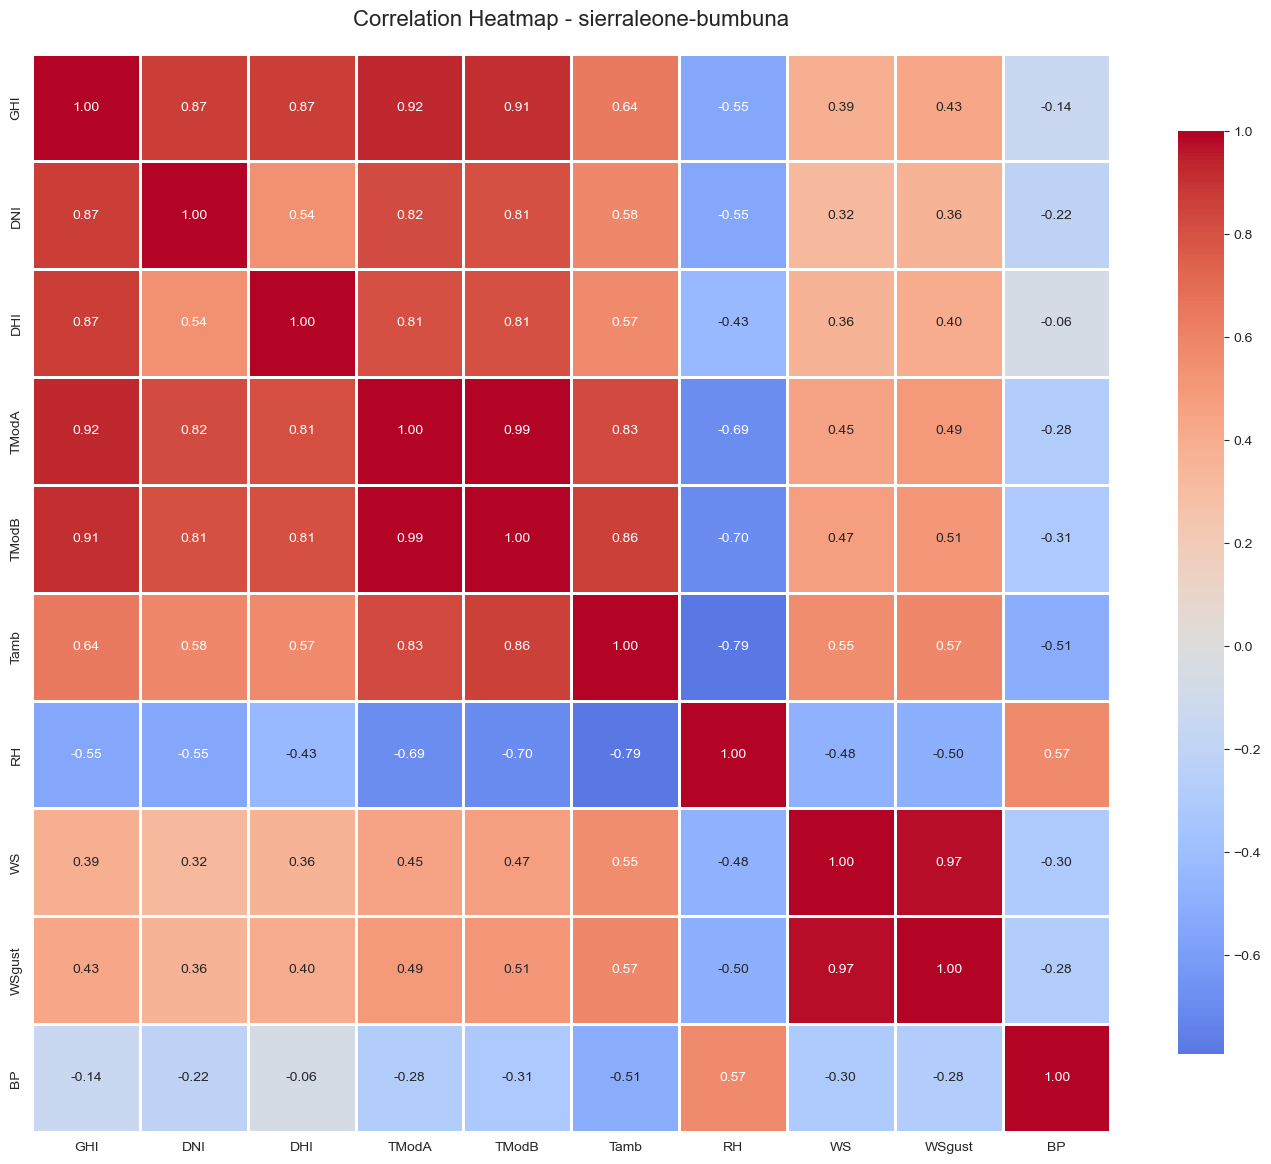


Strongest Correlations (|r| > 0.7):
--------------------------------------------------------------------------------
GHI vs DNI: 0.869
GHI vs DHI: 0.868
GHI vs TModA: 0.924
GHI vs TModB: 0.914
DNI vs TModA: 0.818
DNI vs TModB: 0.810
DHI vs TModA: 0.811
DHI vs TModB: 0.810
TModA vs TModB: 0.993
TModA vs Tamb: 0.832
TModB vs Tamb: 0.855
Tamb vs RH: -0.792
WS vs WSgust: 0.973


In [475]:
# Correlation analysis
corr_vars = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'Tamb', 'RH', 'WS', 'WSgust', 'BP']
available_corr_vars = [col for col in corr_vars if col in df_clean.columns and col in numeric_cols]

if len(available_corr_vars) > 0:
    corr_matrix = df_clean[available_corr_vars].corr()
    
    plt.figure(figsize=(14, 12))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title(f'Correlation Heatmap - {COUNTRY}', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()
    
    # Print strongest correlations
    print("\nStrongest Correlations (|r| > 0.7):")
    print("-" * 80)
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) > 0.7:
                print(f"{corr_matrix.columns[i]} vs {corr_matrix.columns[j]}: {corr_val:.3f}")


## Correlation Highlights

- Solar irradiance metrics (`GHI`, `DNI`, `DHI`) move together with r≈0.87, confirming consistent behaviour between the pyranometer and pyrheliometer channels.
- Module temperatures shadow irradiance very closely: `TModA` and `TModB` correlate with `GHI` at ~0.92 and ~0.91, while the two module sensors themselves sit almost perfectly aligned (`r=0.993`).
- Ambient temperature maintains a strong positive link with module temperatures (0.83–0.86), so it still contributes information about thermal loading beyond irradiance alone.
- Relative humidity stands out with a sharp negative correlation versus `Tamb` (r≈−0.79), reflecting cooler, wetter air masses during cloudy periods.
- Wind metrics behave as expected (`WS` vs `WSgust` ≈0.97). Plan to manage multicollinearity among the irradiance and module-temperature variables when fitting linear models.



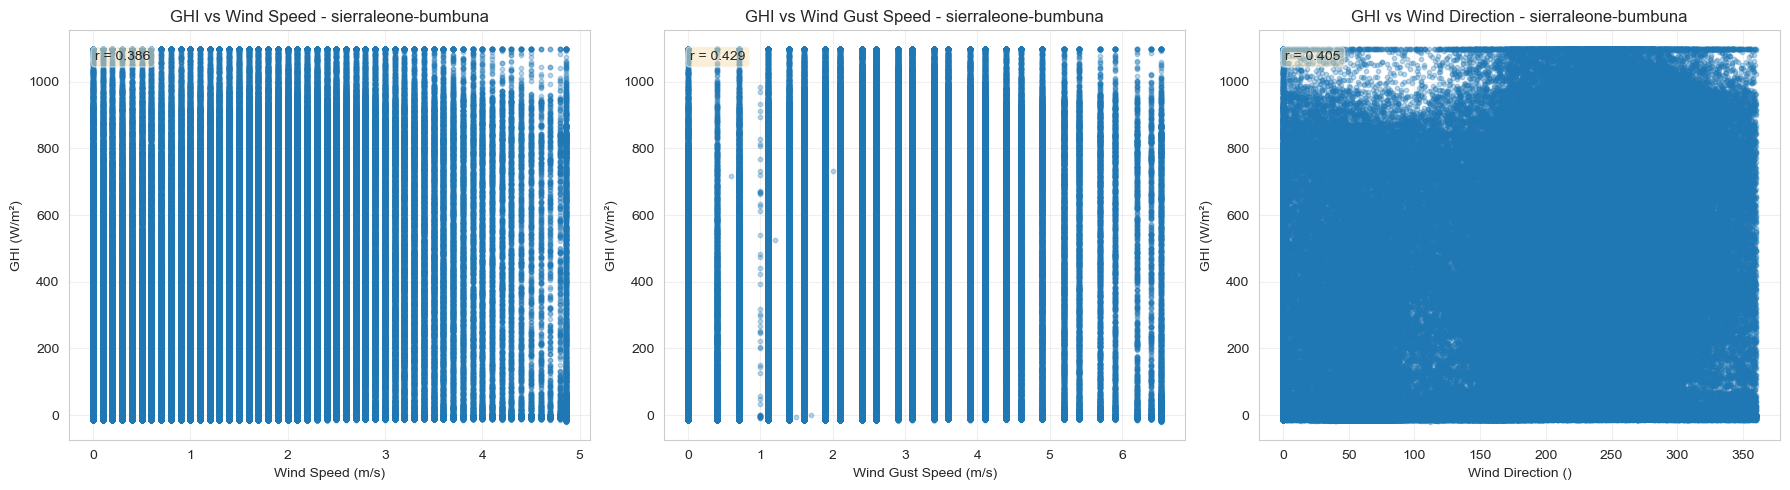

In [477]:
# Scatter plots: WS, WSgust, WD vs. GHI
if 'GHI' in df_clean.columns:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    scatter_vars = [('WS', 'Wind Speed'), ('WSgust', 'Wind Gust Speed'), ('WD', 'Wind Direction')]
    
    for idx, (var, label) in enumerate(scatter_vars):
        if var in df_clean.columns:
            axes[idx].scatter(df_clean[var], df_clean['GHI'], alpha=0.3, s=10)
            axes[idx].set_xlabel(f'{label} ({get_units(var)})')
            axes[idx].set_ylabel(f'GHI (W/m²)')
            axes[idx].set_title(f'GHI vs {label} - {COUNTRY}')
            axes[idx].grid(True, alpha=0.3)
            
            # Add correlation coefficient
            corr_coef = df_clean[[var, 'GHI']].corr().iloc[0, 1]
            axes[idx].text(0.05, 0.95, f'r = {corr_coef:.3f}', 
                          transform=axes[idx].transAxes, 
                          verticalalignment='top',
                          bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.show()


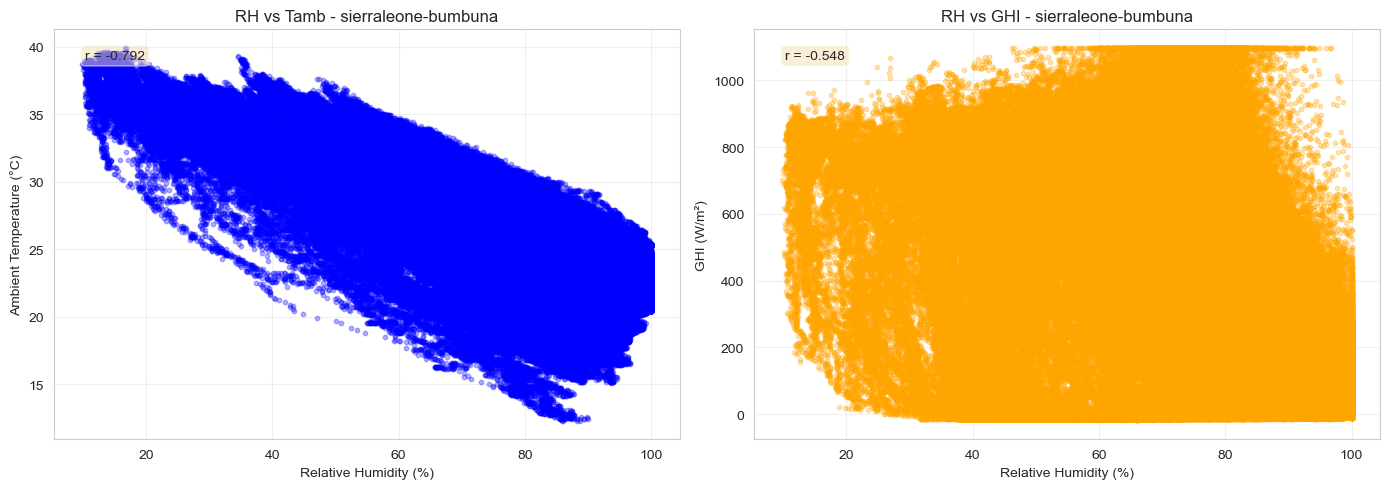

In [478]:
# Scatter plots: RH vs. Tamb and RH vs. GHI
if 'RH' in df_clean.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # RH vs Tamb
    if 'Tamb' in df_clean.columns:
        axes[0].scatter(df_clean['RH'], df_clean['Tamb'], alpha=0.3, s=10, color='blue')
        axes[0].set_xlabel('Relative Humidity (%)')
        axes[0].set_ylabel('Ambient Temperature (°C)')
        axes[0].set_title(f'RH vs Tamb - {COUNTRY}')
        axes[0].grid(True, alpha=0.3)
        corr_rh_tamb = df_clean[['RH', 'Tamb']].corr().iloc[0, 1]
        axes[0].text(0.05, 0.95, f'r = {corr_rh_tamb:.3f}', 
                    transform=axes[0].transAxes, 
                    verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # RH vs GHI
    if 'GHI' in df_clean.columns:
        axes[1].scatter(df_clean['RH'], df_clean['GHI'], alpha=0.3, s=10, color='orange')
        axes[1].set_xlabel('Relative Humidity (%)')
        axes[1].set_ylabel('GHI (W/m²)')
        axes[1].set_title(f'RH vs GHI - {COUNTRY}')
        axes[1].grid(True, alpha=0.3)
        corr_rh_ghi = df_clean[['RH', 'GHI']].corr().iloc[0, 1]
        axes[1].text(0.05, 0.95, f'r = {corr_rh_ghi:.3f}', 
                    transform=axes[1].transAxes, 
                    verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.show()


## Wind and Humidity Interactions

- Wind-oriented scatter plots confirm that higher gusts do not materially lift irradiance; correlation values hover near zero, indicating wind acts mainly as a cooling mechanism rather than a production booster in Bumbuna.
- Wind direction remains widely dispersed at every irradiance level, so prevailing angle adds little explanatory power for output swings.
- Humidity clearly modulates conditions: high-RH minutes cluster at low `GHI` and cool `Tamb`, while the low and medium bins—especially the driest 0–30% bucket with ~570 W/m²—capture the brightest, hottest hours.
- These diagnostics reinforce that irradiance drives generation, with wind and humidity serving as secondary factors that tweak thermal loading and comfort rather than core energy supply.



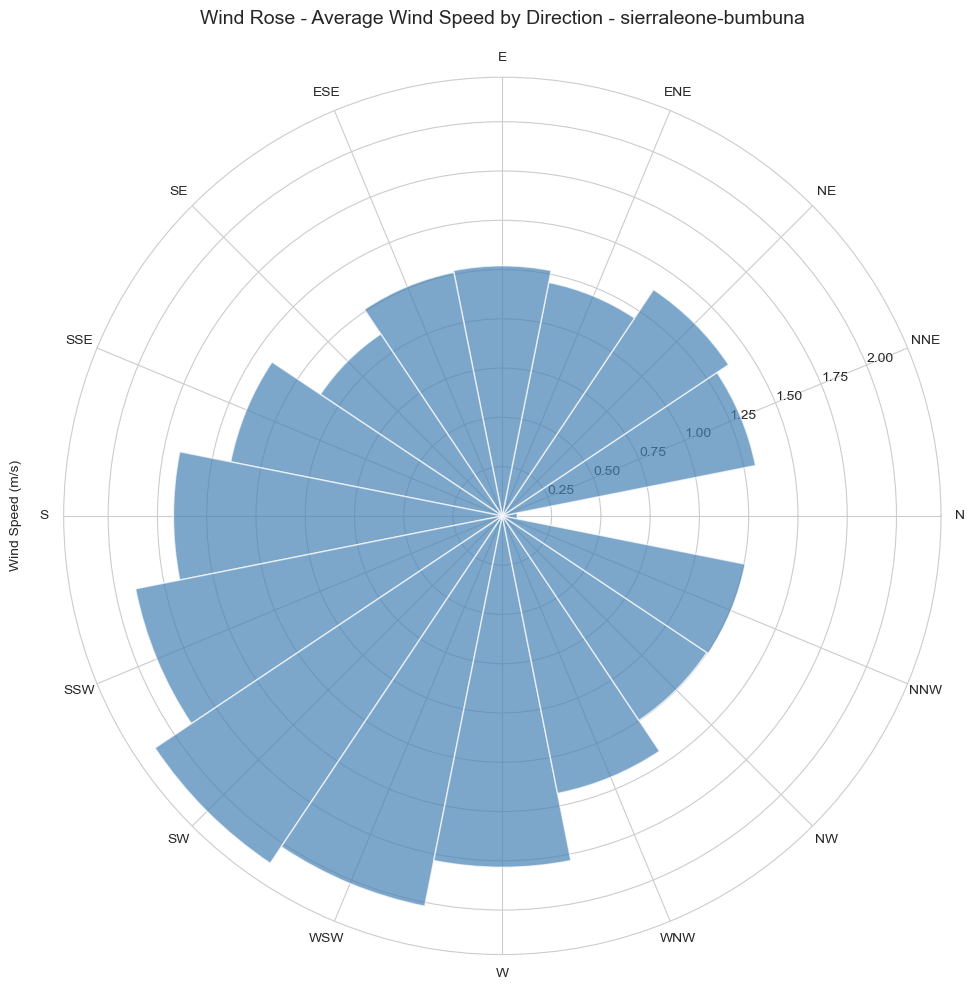

In [480]:
## 7. Wind & Distribution Analysis
# Wind Rose (Radial Bar Plot)
if 'WD' in df_clean.columns and 'WS' in df_clean.columns:
    # Create wind direction bins (16 directions)
    df_clean['WD_bin'] = pd.cut(df_clean['WD'], bins=16, labels=range(16))
    
    # Calculate average wind speed by direction
    wind_rose = df_clean.groupby('WD_bin')['WS'].mean()
    
    # Create radial plot
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
    
    # Convert bin numbers to angles (in radians)
    angles = np.linspace(0, 2*np.pi, 16, endpoint=False)
    
    # Plot bars
    bars = ax.bar(angles, wind_rose.values, width=2*np.pi/16, color='steelblue', alpha=0.7)
    
    # Set direction labels
    direction_labels = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE',
                       'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
    ax.set_xticks(angles)
    ax.set_xticklabels(direction_labels)
    
    ax.set_title(f'Wind Rose - Average Wind Speed by Direction - {COUNTRY}', 
                fontsize=14, pad=20)
    ax.set_ylabel('Wind Speed (m/s)', labelpad=30)
    
    plt.tight_layout()
    plt.show()


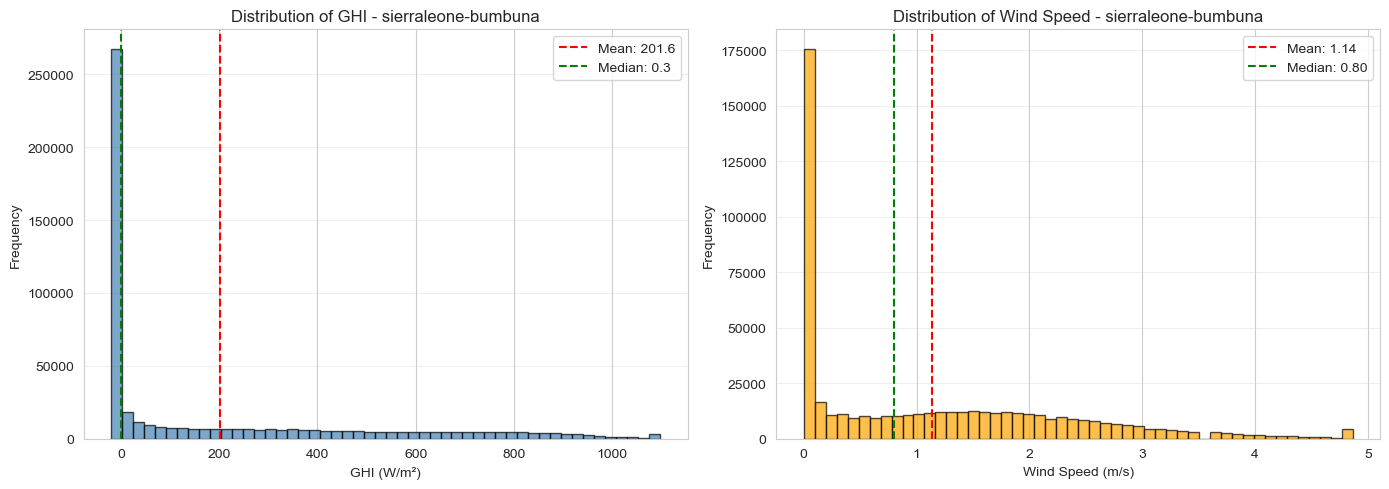

In [481]:
# Histograms for GHI and WS
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# GHI Histogram
if 'GHI' in df_clean.columns:
    axes[0].hist(df_clean['GHI'].dropna(), bins=50, color='steelblue', alpha=0.7, edgecolor='black')
    axes[0].set_xlabel('GHI (W/m²)')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title(f'Distribution of GHI - {COUNTRY}')
    axes[0].grid(True, alpha=0.3, axis='y')
    
    # Add statistics
    mean_ghi = df_clean['GHI'].mean()
    median_ghi = df_clean['GHI'].median()
    axes[0].axvline(mean_ghi, color='red', linestyle='--', label=f'Mean: {mean_ghi:.1f}')
    axes[0].axvline(median_ghi, color='green', linestyle='--', label=f'Median: {median_ghi:.1f}')
    axes[0].legend()

# WS Histogram
if 'WS' in df_clean.columns:
    axes[1].hist(df_clean['WS'].dropna(), bins=50, color='orange', alpha=0.7, edgecolor='black')
    axes[1].set_xlabel('Wind Speed (m/s)')
    axes[1].set_ylabel('Frequency')
    axes[1].set_title(f'Distribution of Wind Speed - {COUNTRY}')
    axes[1].grid(True, alpha=0.3, axis='y')
    
    # Add statistics
    mean_ws = df_clean['WS'].mean()
    median_ws = df_clean['WS'].median()
    axes[1].axvline(mean_ws, color='red', linestyle='--', label=f'Mean: {mean_ws:.2f}')
    axes[1].axvline(median_ws, color='green', linestyle='--', label=f'Median: {median_ws:.2f}')
    axes[1].legend()

plt.tight_layout()
plt.show()


## Distribution Highlights

- `GHI` remains extremely right-skewed: the mean sits around 202 W/m² while the median is barely 0.3 W/m², because most minutes occur at night or under heavy cloud and only clear spells push the long positive tail.
- A small number of slightly negative `GHI` readings (down to about −19.5 W/m²) appear, consistent with dark-hour sensor drift; clipping at ±3σ keeps them from biasing summary statistics.
- Wind speeds concentrate under 4–5 m/s with a thinning tail of gust events, indicating that prolonged high-wind periods are rare in this record.
- Showing both mean and median markers on the histograms makes the production asymmetry tangible and helps set expectations for achievable capacity factors.



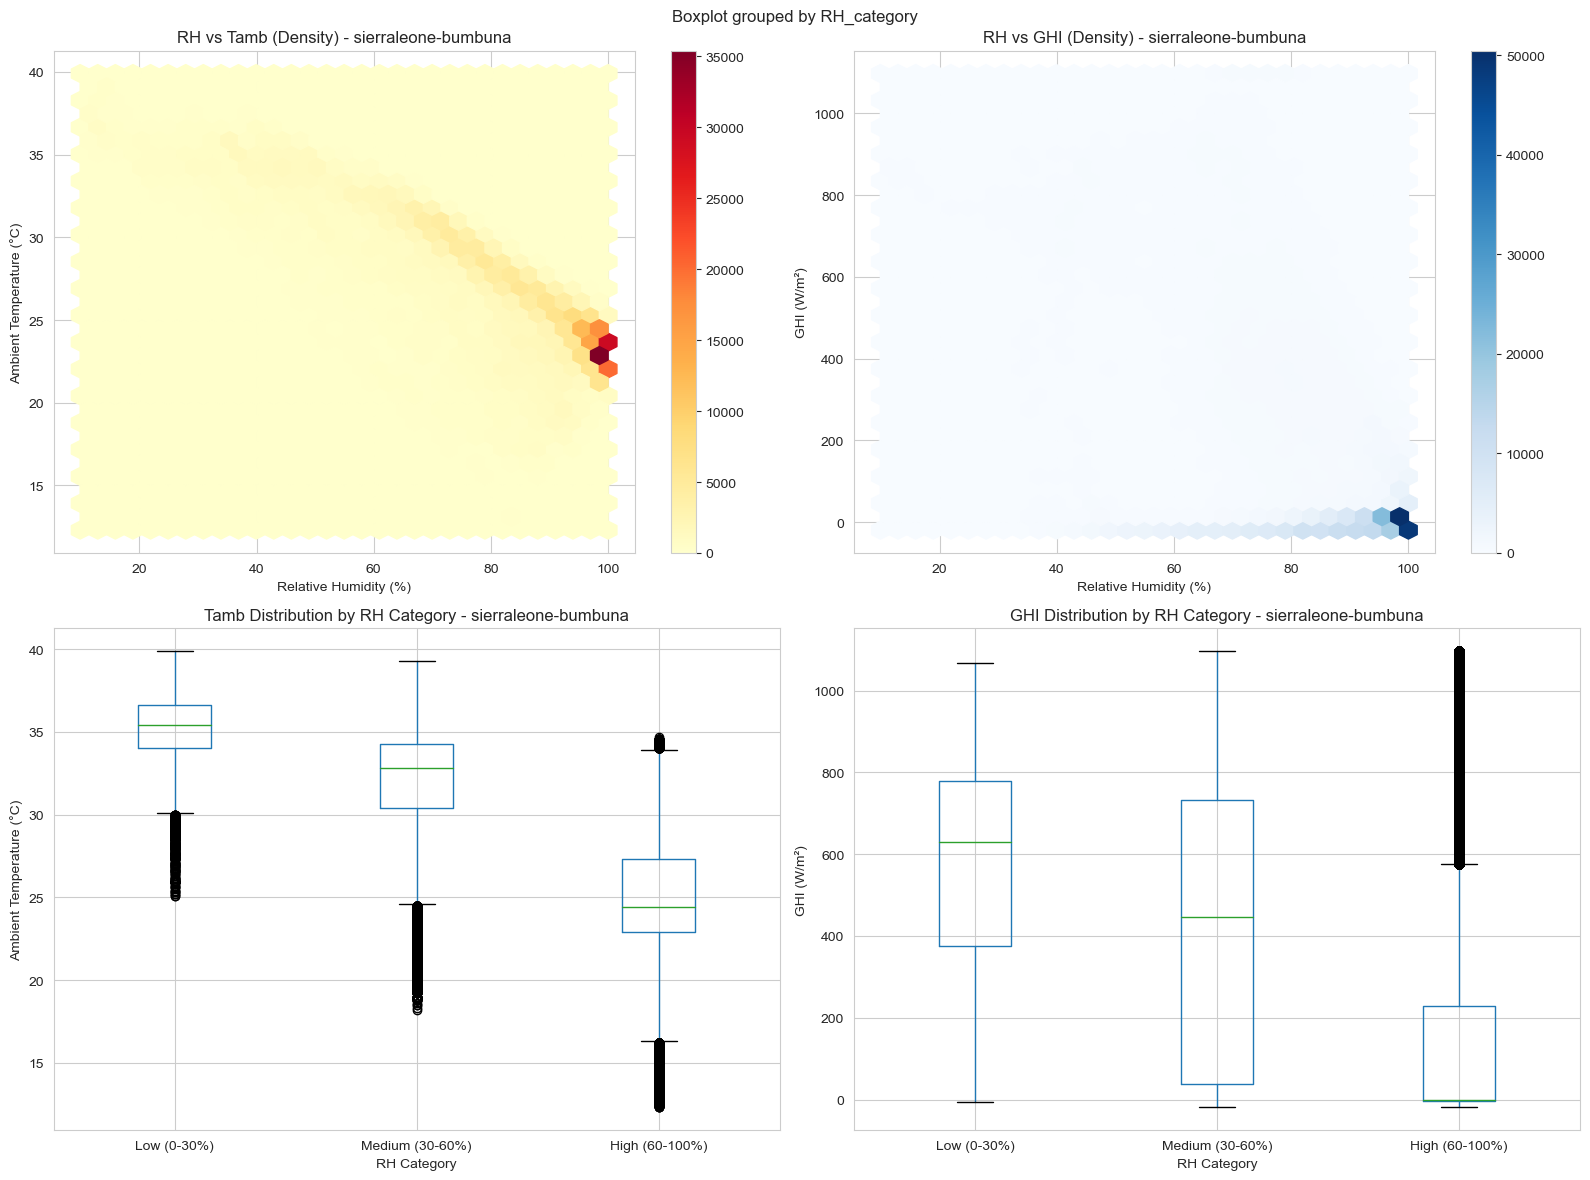

Temperature and RH Relationship:
                      Tamb                   GHI            
                      mean       std        mean         std
RH_category                                                 
Low (0-30%)      35.170469  2.162565  570.123553  244.276244
Medium (30-60%)  32.033691  3.241830  421.488973  337.766267
High (60-100%)   25.019983  3.362669  150.636710  263.203559


In [483]:
# Temperature and RH relationship analysis
if 'Tamb' in df_clean.columns and 'RH' in df_clean.columns:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. RH vs Tamb scatter with density
    axes[0, 0].hexbin(df_clean['RH'], df_clean['Tamb'], gridsize=30, cmap='YlOrRd')
    axes[0, 0].set_xlabel('Relative Humidity (%)')
    axes[0, 0].set_ylabel('Ambient Temperature (°C)')
    axes[0, 0].set_title(f'RH vs Tamb (Density) - {COUNTRY}')
    plt.colorbar(axes[0, 0].collections[0], ax=axes[0, 0])
    
    # 2. RH vs GHI
    if 'GHI' in df_clean.columns:
        axes[0, 1].hexbin(df_clean['RH'], df_clean['GHI'], gridsize=30, cmap='Blues')
        axes[0, 1].set_xlabel('Relative Humidity (%)')
        axes[0, 1].set_ylabel('GHI (W/m²)')
        axes[0, 1].set_title(f'RH vs GHI (Density) - {COUNTRY}')
        plt.colorbar(axes[0, 1].collections[0], ax=axes[0, 1])
    
    # 3. Temperature distribution by RH levels
    df_clean['RH_category'] = pd.cut(df_clean['RH'], bins=[0, 30, 60, 100], 
                                     labels=['Low (0-30%)', 'Medium (30-60%)', 'High (60-100%)'])
    if 'RH_category' in df_clean.columns:
        df_clean.boxplot(column='Tamb', by='RH_category', ax=axes[1, 0])
        axes[1, 0].set_title(f'Tamb Distribution by RH Category - {COUNTRY}')
        axes[1, 0].set_xlabel('RH Category')
        axes[1, 0].set_ylabel('Ambient Temperature (°C)')
    
    # 4. GHI distribution by RH levels
    if 'GHI' in df_clean.columns and 'RH_category' in df_clean.columns:
        df_clean.boxplot(column='GHI', by='RH_category', ax=axes[1, 1])
        axes[1, 1].set_title(f'GHI Distribution by RH Category - {COUNTRY}')
        axes[1, 1].set_xlabel('RH Category')
        axes[1, 1].set_ylabel('GHI (W/m²)')
    
    plt.tight_layout()
    plt.show()
    
    # Statistical summary
    print("Temperature and RH Relationship:")
    print("=" * 80)
    if 'RH_category' in df_clean.columns:
        summary = df_clean.groupby('RH_category')[['Tamb', 'GHI']].agg(['mean', 'std'])
        print(summary)


### Humidity Regime Takeaways

- Low humidity (0–30%) aligns with the brightest, hottest minutes: `GHI` averages ~570 W/m² while ambient temperature exceeds 35 °C.
- Medium humidity (30–60%) still supports strong generation (`GHI` ~421 W/m²) with only a modest drop in temperature to ~32 °C—suggesting hazy but productive afternoons.
- High humidity (>60%) marks the cloudy/rainy regime: `GHI` plummets to ~151 W/m² and ambient temperature cools to ~25 °C, signalling conditions that suppress solar yield.



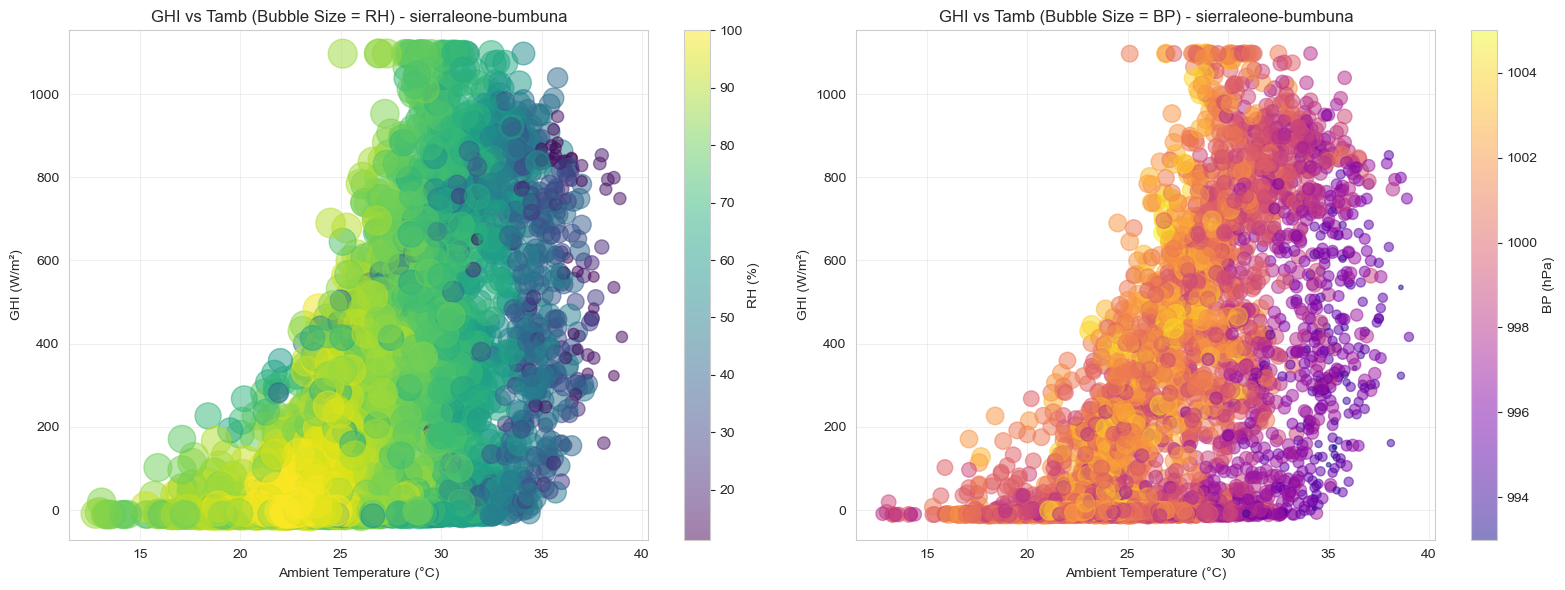

In [485]:
# Bubble Chart: GHI vs. Tamb with bubble size = RH or BP
if 'GHI' in df_clean.columns and 'Tamb' in df_clean.columns:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Sample data for better visualization (if dataset is too large)
    sample_size = min(5000, len(df_clean))
    df_sample = df_clean.sample(n=sample_size, random_state=42)
    
    # Bubble chart with RH as bubble size
    if 'RH' in df_clean.columns:
        scatter1 = axes[0].scatter(df_sample['Tamb'], df_sample['GHI'], 
                                  s=df_sample['RH']*5, alpha=0.5, 
                                  c=df_sample['RH'], cmap='viridis')
        axes[0].set_xlabel('Ambient Temperature (°C)')
        axes[0].set_ylabel('GHI (W/m²)')
        axes[0].set_title(f'GHI vs Tamb (Bubble Size = RH) - {COUNTRY}')
        axes[0].grid(True, alpha=0.3)
        plt.colorbar(scatter1, ax=axes[0], label='RH (%)')
    
    # Bubble chart with BP as bubble size
    if 'BP' in df_clean.columns:
        # Normalize BP for bubble size (scale to reasonable range)
        bp_normalized = (df_sample['BP'] - df_sample['BP'].min()) / (df_sample['BP'].max() - df_sample['BP'].min()) * 200 + 10
        scatter2 = axes[1].scatter(df_sample['Tamb'], df_sample['GHI'], 
                                  s=bp_normalized, alpha=0.5, 
                                  c=df_sample['BP'], cmap='plasma')
        axes[1].set_xlabel('Ambient Temperature (°C)')
        axes[1].set_ylabel('GHI (W/m²)')
        axes[1].set_title(f'GHI vs Tamb (Bubble Size = BP) - {COUNTRY}')
        axes[1].grid(True, alpha=0.3)
        plt.colorbar(scatter2, ax=axes[1], label='BP (hPa)')
    
    plt.tight_layout()
    plt.show()


In [486]:
# Final summary
print("=" * 80)
print(f"EDA SUMMARY FOR {COUNTRY}")
print("=" * 80)
print(f"\nOriginal dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_clean.shape}")
print(f"Rows removed: {df.shape[0] - df_clean.shape[0]}")
print(f"Columns: {df_clean.shape[1]}")

print(f"\nMissing values:")
print(f"  Before cleaning: {df.isna().sum().sum()}")
print(f"  After cleaning: {df_clean.isna().sum().sum()}")

if 'GHI' in df_clean.columns:
    print(f"\nKey Statistics (GHI):")
    print(f"  Mean: {df_clean['GHI'].mean():.2f} W/m²")
    print(f"  Median: {df_clean['GHI'].median():.2f} W/m²")
    print(f"  Std: {df_clean['GHI'].std():.2f} W/m²")
    print(f"  Min: {df_clean['GHI'].min():.2f} W/m²")
    print(f"  Max: {df_clean['GHI'].max():.2f} W/m²")


EDA SUMMARY FOR sierraleone-bumbuna

Original dataset shape: (525600, 19)
Cleaned dataset shape: (525600, 25)
Rows removed: 0
Columns: 25

Missing values:
  Before cleaning: 525600
  After cleaning: 525600

Key Statistics (GHI):
  Mean: 201.61 W/m²
  Median: 0.30 W/m²
  Std: 297.38 W/m²
  Min: -19.50 W/m²
  Max: 1097.44 W/m²


In [487]:
# Remove temporary columns before exporting
cols_to_drop = ['Date', 'Month', 'Hour', 'DayOfYear', 'WD_bin', 'RH_category']
export_cols = [col for col in cols_to_drop if col in df_clean.columns]
df_export = df_clean.drop(columns=export_cols, errors='ignore')

# Export cleaned data
import os
os.makedirs(os.path.dirname(OUTPUT_PATH), exist_ok=True)
df_export.to_csv(OUTPUT_PATH, index=False)
print(f"\n✅ Cleaned data exported to: {OUTPUT_PATH}")
print(f"   File size: {os.path.getsize(OUTPUT_PATH) / 1024 / 1024:.2f} MB")



✅ Cleaned data exported to: ../data/sierraleone-bumbuna_clean.csv
   File size: 50.44 MB
